# **ML Lab - Linear Regression**
Urlana Suresh Kumar - 22071A6662

# Linear Regression Model for Iris Dataset

In this notebook, we will use the Iris dataset to perform a linear regression analysis, predicting the "petal length" based on other features. Linear regression will help us understand the relationship between the sepal length, sepal width, and petal width, and how they predict the petal length.


In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step 1 : Loading & Preparing Data

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

# Prepare DataFrame for easy manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y

# Display the first few rows of the dataset
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


## Step 2: Train the Linear Regression Model

We use the `LinearRegression` model from scikit-learn to train on the selected features and target variable.


In [5]:
X_linear = df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y_linear = df['petal length (cm)']

# Step 4: Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_linear, y_linear)

LinearRegression()

## Step 3: Evaluate and Visualize the Results

Finally, we visualize the predictions against the actual petal lengths, plotting a scatter plot of actual vs. predicted values along with a red line indicating perfect predictions.


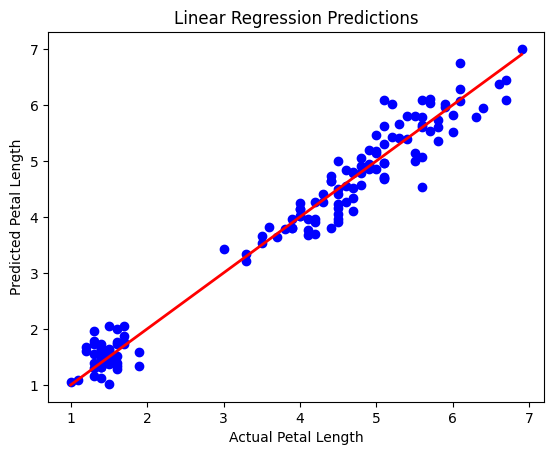

In [6]:
# Make predictions
predictions_linear = linear_reg.predict(X_linear)

# Plotting the predictions
plt.scatter(y_linear, predictions_linear, color='blue')
plt.xlabel('Actual Petal Length')
plt.ylabel('Predicted Petal Length')
plt.title('Linear Regression Predictions')
plt.plot([y_linear.min(), y_linear.max()], [y_linear.min(), y_linear.max()], color='red', linewidth=2)
plt.show()


## Conclusion

By running this notebook, we will understand how well the linear regression model predicts petal length and visualize its performance. If the points are close to the red line, it indicates that the model is making accurate predictions.


# Logistic Regression Model for Iris Dataset

In this section, we will use the Iris dataset to perform a logistic regression analysis, predicting the species of Iris based on two features: "sepal length" and "sepal width." We will also visualize the decision boundary formed by the logistic regression model.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Step 1: Train the Logistic Regression Model

We use the logistic regression algorithm from scikit-learn to train on the selected features and target variable (species).

In [10]:
X_logistic = pd.DataFrame(X, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
y_logistic = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression(max_iter=200)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Step 2: Evaluate the Model

Once the model is trained, we evaluate its performance using the accuracy score.

In [12]:
predictions_logistic = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions_logistic)

print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 90.00%


## Step 3: Visualize the Decision Boundary

We will plot the decision boundary formed by the logistic regression model using the two selected features. The decision boundary helps us understand how the model classifies the data points.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


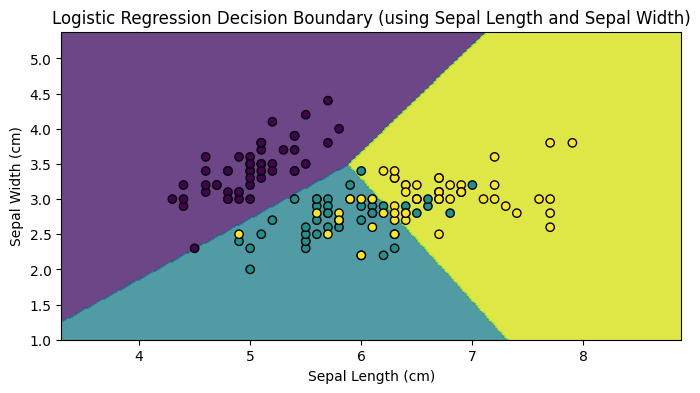

In [13]:
h = 0.02  # Step size in the mesh
x_min, x_max = X_logistic.iloc[:, 0].min() - 1, X_logistic.iloc[:, 0].max() + 1
y_min, y_max = X_logistic.iloc[:, 1].min() - 1, X_logistic.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict for each point in the mesh grid
Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(8, 4))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_logistic.iloc[:, 0], X_logistic.iloc[:, 1], c=y_logistic, edgecolors='k', marker='o')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Logistic Regression Decision Boundary (using Sepal Length and Sepal Width)')
plt.show()


## Conclusion

This notebook demonstrates how to apply logistic regression to classify Iris species based on two features: sepal length and sepal width. By visualizing the decision boundary, we can see how the model divides the feature space into regions corresponding to different Iris species.
